<a href="https://colab.research.google.com/github/sameh00alsharawy/machine-learning-/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
!gdown --id '0BxYys69jI14kYVM3aVhKS1VhRUk' --output celeb_img.tar


Downloading...
From: https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk
To: /content/celeb_img.tar
107MB [00:01, 80.9MB/s]


In [ ]:
import os
import tarfile

local_tar = 'celeb_img.tar'
tar = tarfile.open(local_tar)
tar.extractall()
tar.close()


In [ ]:
import os

In [ ]:
train_dir='/content/UTKFace'
pic_names=os.listdir(train_dir)

In [ ]:
len(pic_names)

23708

Using TensorFlow backend.


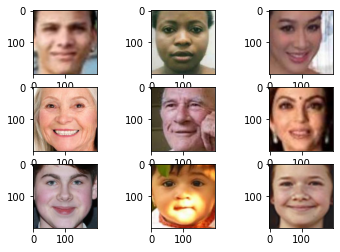

In [ ]:
from keras.preprocessing.image import load_img
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
i=1
for pic_name in pic_names[0:9]:
  sp = plt.subplot(3, 3, i)
  img_path = os.path.join(train_dir, pic_name)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  i+=1
plt.show()


In [ ]:
img = load_img(os.path.join(train_dir, pic_names[0]))
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(200, 200)


In [ ]:
import numpy as np
import pandas as pd 

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model,Sequential

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
im = image.load_img(os.path.join(train_dir, pic_names[0]))
im = image.img_to_array(im)

In [ ]:
im.shape

(200, 200, 3)

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255,
                              validation_split = 0.2)
train_gen = data_gen.flow_from_directory('/content',
                                         classes =['UTKFace'],
                                         target_size = (200,200),
                                         class_mode = 'input',
                                         subset = 'training'
                                         )

valid_gen = data_gen.flow_from_directory('/content',
                                         classes =['UTKFace'],
                                         target_size = (200,200),
                                         class_mode = 'input',
                                         subset = 'validation'
                                         )

Found 18967 images belonging to 1 classes.
Found 4741 images belonging to 1 classes.


In [ ]:
batch = train_gen.next()

In [ ]:
batch[1].shape

(32, 200, 200, 3)

In [ ]:
batch[0].shape

(32, 200, 200, 3)

In [ ]:
train_gen.reset()

In [ ]:
input_img = Input(shape=(200, 200, 3))
x = Convolution2D(16, 3, activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, 3, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, 3, activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (8, 4, 4) i.e. 128-dimensional

x = Convolution2D(8, 3, activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 3, activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(3, 3, activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 8)       1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 8)         0   

In [ ]:
hist =autoencoder.fit_generator(
    train_gen,
    steps_per_epoch = train_gen.samples//32,
    epochs = 20,
    verbose = 1,
    validation_data=valid_gen,
    validation_steps=valid_gen.samples//32
)


Epoch 1/20
592/592 [==============================] - 64s 109ms/step - loss: 0.0081 - val_loss: 0.0030
Epoch 2/20
592/592 [==============================] - 62s 104ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 3/20
592/592 [==============================] - 61s 103ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4/20
592/592 [==============================] - 61s 104ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/20
592/592 [==============================] - 61s 103ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 6/20
592/592 [==============================] - 61s 104ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 7/20
592/592 [==============================] - 61s 104ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 8/20
592/592 [==============================] - 62s 104ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 9/20
592/592 [==============================] - 61s 103ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 10/20
592/592 [==============================] - 61s 104ms/step - l

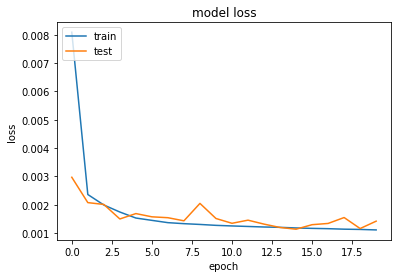

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
batch = valid_gen.next()[0]

In [ ]:
decoded_img = autoencoder.predict(batch)

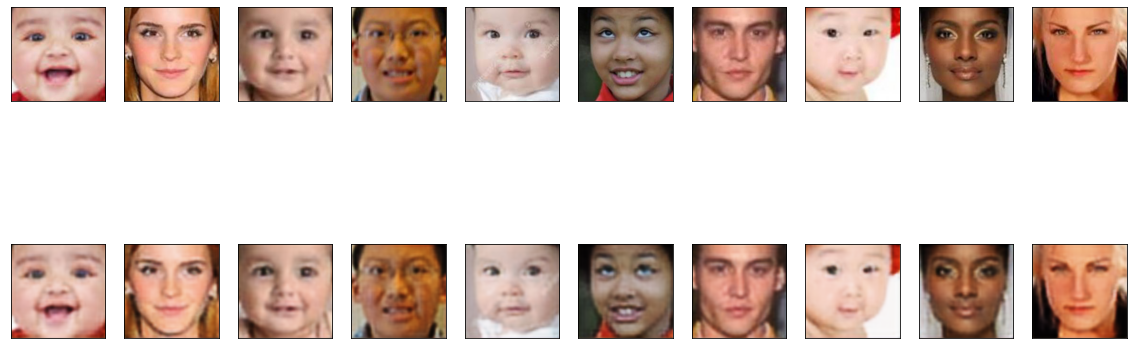

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(batch[i].reshape(200, 200,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img[i].reshape(200, 200,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()